# Airline Customers Satisfaction


Objective:

The main aim of this analysis is to assess various machine learning algorithms and determine the most suitable algorithm to 
classify customer satisfaction. This analysis also aims to ascertain and highlight the most critical variables in determining 
customer satisfaction.

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [2]:
data=pd.read_csv("airline_passenger_satisfaction.csv")
#Printing the first 5 rows in the dataset
data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [3]:
#checking for the number of rows and columns
data.shape

(129880, 24)

In [4]:
#Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [5]:
# Data Cleaning
#checking the number of null values
data.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [6]:
# Fill missing data with mean value of column
data['Arrival Delay'] = data['Arrival Delay'].fillna(value = data['Arrival Delay'].mean())

In [7]:
#Verify that missing values were replaced. 
data.isnull().sum()

ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

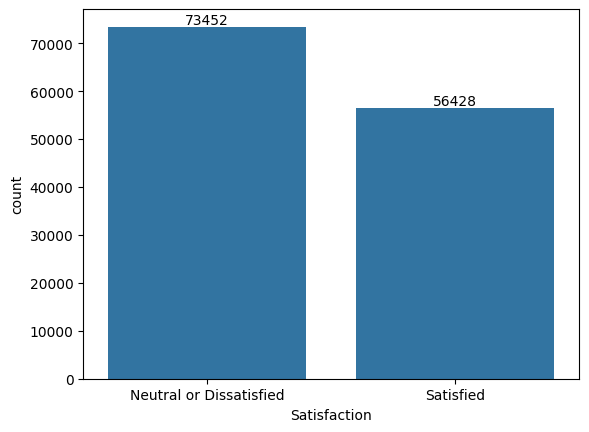

In [8]:
# Number of customers based on satisfaction
s = sns.countplot(x='Satisfaction',data=data)
abs_values = data['Satisfaction'].value_counts().values
s.bar_label(container=s.containers[0], labels=abs_values);

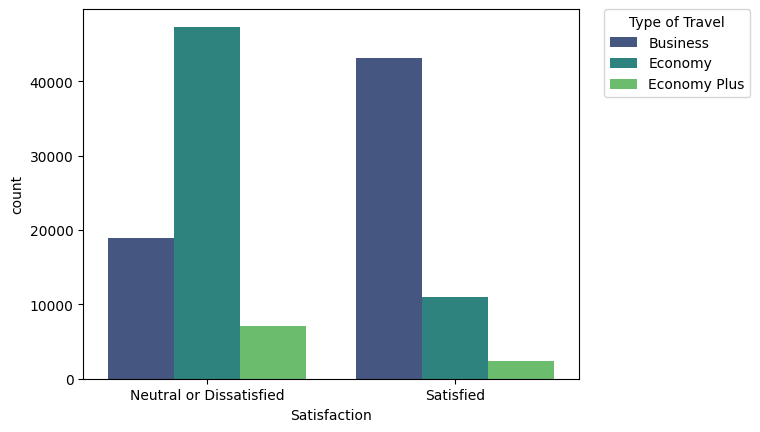

In [9]:
# Customer satisfaction base based on class of travel
sns.countplot(x='Satisfaction',data=data, hue='Class', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, title= 'Type of Travel', borderaxespad=0.)

In [10]:
#Convert Categorical Features
data = pd.get_dummies(data,drop_first=True)
data.head()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,...,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Gender_Male,Customer Type_Returning,Type of Travel_Personal,Class_Economy,Class_Economy Plus,Satisfaction_Satisfied
0,1,48,821,2,5.0,3,3,4,3,3,...,5,3,5,5,True,False,False,False,False,False
1,2,35,821,26,39.0,2,2,3,5,2,...,5,2,5,5,False,True,False,False,False,True
2,3,41,853,0,0.0,4,4,4,5,4,...,3,4,3,3,True,True,False,False,False,True
3,4,50,1905,0,0.0,2,2,3,4,2,...,5,2,5,5,True,True,False,False,False,True
4,5,49,3470,0,1.0,3,3,3,5,3,...,3,3,3,3,False,True,False,False,False,True


In [11]:
#Splitting the dataset into X and y variables
X= data.drop('Satisfaction_Satisfied',axis=1)
y= data['Satisfaction_Satisfied']

In [12]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=0)
# Scale the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [13]:
#using the logisticRegression model
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [14]:
#Using the K-Nearest Neighbors model
kn=KNeighborsClassifier()
kn.fit(X_train,y_train)

KNeighborsClassifier()

In [15]:
#Using the Random Forest Model
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [16]:
#Using the Support Vector Machine model
sv=SVC()
sv.fit(X_train,y_train)

SVC()

In [31]:
#For logistic Regression
y_pred=logreg.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print("Accuracy:",((22717/25976)))
print(classification_report(y_pred,y_test))

0.8745380351093317
[[13206  1817]
 [ 1442  9511]]
Accuracy: 0.8745380351093317
              precision    recall  f1-score   support

       False       0.90      0.88      0.89     15023
        True       0.84      0.87      0.85     10953

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.88      0.87      0.87     25976



In [34]:
#for Random Forest
y_pred=rf.predict(X_test)

In [35]:
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print("Accuracy:",((25011/25976)))
print(classification_report(y_pred,y_test))

0.9628503233754234
[[14328   645]
 [  320 10683]]
Accuracy: 0.9628503233754234
              precision    recall  f1-score   support

       False       0.98      0.96      0.97     14973
        True       0.94      0.97      0.96     11003

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [36]:
#for Support Vector Machine
y_pred=sv.predict(X_test)

In [37]:
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print("Accuracy:",((24833/25976)))
print(classification_report(y_pred,y_test))

0.9559978441638436
[[14196   691]
 [  452 10637]]
Accuracy: 0.9559978441638436
              precision    recall  f1-score   support

       False       0.97      0.95      0.96     14887
        True       0.94      0.96      0.95     11089

    accuracy                           0.96     25976
   macro avg       0.95      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [23]:
#for K-Nearest Neighbors
y_pred=kn.predict(X_test)

In [24]:
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print("Accuracy:",((24110/25976)))
print(classification_report(y_pred,y_test))

0.928164459501078
[[14067  1285]
 [  581 10043]]
Accuracy: 0.928164459501078
              precision    recall  f1-score   support

       False       0.96      0.92      0.94     15352
        True       0.89      0.95      0.91     10624

    accuracy                           0.93     25976
   macro avg       0.92      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



In [25]:
#Based on the above prediction,Random Forest model has the highest accuracy of 96%.